In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFA-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,Pstatus,Fedu,studytime,failures,schoolsup,paid,higher,romantic,Dalc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G3
0,1,1,18,1,0,4,2,0,1,0,1,0,1,3,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,6
1,1,1,17,1,1,1,2,0,0,0,1,0,1,3,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,6
2,1,1,15,1,1,1,2,0,1,0,1,0,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,6
3,1,1,15,1,1,2,3,0,0,0,1,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,7
4,1,1,16,1,1,3,2,0,0,0,1,0,1,5,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,7


In [3]:
df_por.shape

(649, 33)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,7.287109,10
1,6.832031,6
2,7.591797,9
3,6.257812,6
4,5.599609,6


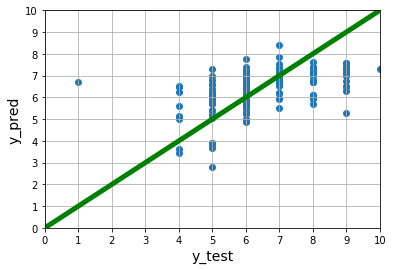

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

1.3283663790127807

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.840000,10
1,6.467742,6
2,6.840000,9
3,6.840000,6
4,6.051282,6


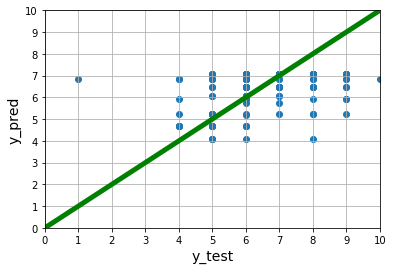

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [18]:
rmse(y_pred,y_test)

1.4366050772542989

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.980210,10
1,6.407539,6
2,7.257889,9
3,6.290425,6
4,6.183812,6


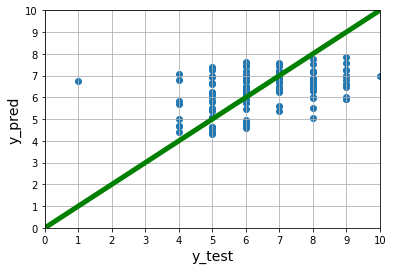

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [24]:
rmse(y_pred,y_test)

1.363504901189886

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.531525,10
1,6.383513,6
2,6.709024,9
3,6.441795,6
4,5.971586,6


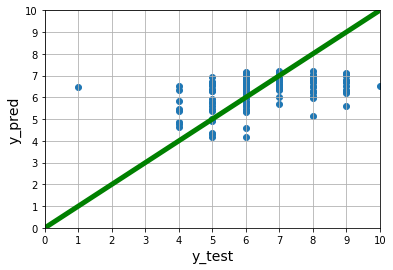

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [30]:
rmse(y_pred,y_test)

1.343172274565679

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 32)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 130 samples
Epoch 1/250
519/519 [==============================] - 1s 2ms/sample - loss: 41.3276 - val_loss: 41.1052
Epoch 2/250
519/519 [==============================] - 0s 75us/sample - loss: 36.3672 - val_loss: 35.1231
Epoch 3/250
519/519 [==============================] - 0s 75us/sample - loss: 29.2768 - val_loss: 26.0373
Epoch 4/250
519/519 [==============================] - 0s 71us/sample - loss: 19.6979 - val_loss: 13.2350
Epoch 5/250
519/519 [==============================] - 0s 73us/sample - loss: 9.8472 - val_loss: 3.3271
Epoch 6/250
519/519 [==============================] - 0s 67us/sample - loss: 6.7688 - val_loss: 2.2450
Epoch 7/250
519/519 [==============================] - 0s 67us/sample - loss: 8.2424 - val_loss: 3.9199
Epoch 8/250
519/519 [==============================] - 0s 71us/sample - loss: 6.9384 - val_loss: 4.4852
Epoch 9/250
519/519 [==============================] - 0s 71us/sample - loss: 7.0927 - val_loss: 4.2911
Epoch 10/25

519/519 [==============================] - 0s 69us/sample - loss: 3.0676 - val_loss: 3.1986
Epoch 79/250
519/519 [==============================] - 0s 73us/sample - loss: 3.0912 - val_loss: 3.0853
Epoch 80/250
519/519 [==============================] - 0s 64us/sample - loss: 3.0093 - val_loss: 3.1099
Epoch 81/250
519/519 [==============================] - 0s 67us/sample - loss: 2.9418 - val_loss: 2.8522
Epoch 82/250
519/519 [==============================] - 0s 69us/sample - loss: 2.8530 - val_loss: 3.1107
Epoch 83/250
519/519 [==============================] - 0s 75us/sample - loss: 2.8690 - val_loss: 2.8432
Epoch 84/250
519/519 [==============================] - 0s 69us/sample - loss: 2.8812 - val_loss: 2.7926
Epoch 85/250
519/519 [==============================] - 0s 67us/sample - loss: 2.9894 - val_loss: 3.4532
Epoch 86/250
519/519 [==============================] - 0s 69us/sample - loss: 3.0899 - val_loss: 2.6555
Epoch 87/250
519/519 [==============================] - 0s 69us/samp

519/519 [==============================] - 0s 71us/sample - loss: 2.4763 - val_loss: 2.5486
Epoch 156/250
519/519 [==============================] - 0s 69us/sample - loss: 2.4660 - val_loss: 2.2886
Epoch 157/250
519/519 [==============================] - 0s 67us/sample - loss: 2.5196 - val_loss: 2.2916
Epoch 158/250
519/519 [==============================] - 0s 67us/sample - loss: 2.1612 - val_loss: 2.3705
Epoch 159/250
519/519 [==============================] - 0s 67us/sample - loss: 2.2827 - val_loss: 2.2402
Epoch 160/250
519/519 [==============================] - 0s 66us/sample - loss: 2.4430 - val_loss: 2.3884
Epoch 161/250
519/519 [==============================] - 0s 66us/sample - loss: 2.4548 - val_loss: 2.1735
Epoch 162/250
519/519 [==============================] - 0s 69us/sample - loss: 2.1581 - val_loss: 2.2785
Epoch 163/250
519/519 [==============================] - 0s 73us/sample - loss: 2.4749 - val_loss: 2.5555
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 71us/sample - loss: 2.1167 - val_loss: 1.9292
Epoch 233/250
519/519 [==============================] - 0s 77us/sample - loss: 2.0210 - val_loss: 1.9560
Epoch 234/250
519/519 [==============================] - 0s 67us/sample - loss: 2.1079 - val_loss: 1.8421
Epoch 235/250
519/519 [==============================] - 0s 67us/sample - loss: 2.1284 - val_loss: 1.8043
Epoch 236/250
519/519 [==============================] - 0s 69us/sample - loss: 2.1542 - val_loss: 1.9657
Epoch 237/250
519/519 [==============================] - 0s 69us/sample - loss: 1.9728 - val_loss: 2.0033
Epoch 238/250
519/519 [==============================] - 0s 67us/sample - loss: 2.0978 - val_loss: 1.8398
Epoch 239/250
519/519 [==============================] - 0s 71us/sample - loss: 1.9099 - val_loss: 1.8215
Epoch 240/250
519/519 [==============================] - 0s 69us/sample - loss: 1.8492 - val_loss: 1.8892
Epoch 241/250
519/519 [==============================] - 0s 

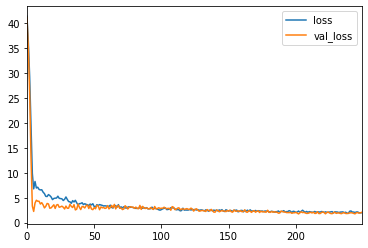

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.620637,10
1,6.310336,6
2,7.055526,9
3,5.783377,6
4,5.075904,6


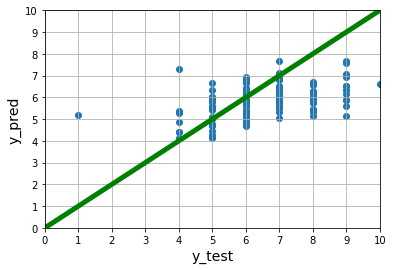

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [41]:
rmse(y_pred,y_test)

1.4378636217851248

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 259 samples
Epoch 1/250
519/519 [==============================] - 1s 1ms/sample - loss: 35.1058 - val_loss: 31.0783
Epoch 2/250
519/519 [==============================] - 0s 79us/sample - loss: 28.4195 - val_loss: 23.2659
Epoch 3/250
519/519 [==============================] - 0s 75us/sample - loss: 19.3124 - val_loss: 13.3062
Epoch 4/250
519/519 [==============================] - 0s 81us/sample - loss: 10.6752 - val_loss: 5.1518
Epoch 5/250
519/519 [==============================] - 0s 102us/sample - loss: 7.9399 - val_loss: 3.5786
Epoch 6/250
519/519 [==============================] - 0s 85us/sample - loss: 7.0771 - val_loss: 4.4000
Epoch 7/250
519/519 [==============================] - 0s 81us/sample - loss: 6.8838 - val_loss: 5.1204
Epoch 8/250
519/519 [==============================] - 0s 83us/sample - loss: 6.7149 - val_loss: 4.5383
Epoch 9/250
519/519 [==============================] - 0s 79us/sample - loss: 6.7750 - val_loss: 3.5693
Epoch 10/25

519/519 [==============================] - 0s 83us/sample - loss: 2.6270 - val_loss: 1.9382
Epoch 79/250
519/519 [==============================] - 0s 114us/sample - loss: 2.6735 - val_loss: 1.7224
Epoch 80/250
519/519 [==============================] - 0s 79us/sample - loss: 2.6522 - val_loss: 1.9619
Epoch 81/250
519/519 [==============================] - 0s 75us/sample - loss: 2.5766 - val_loss: 1.7717
Epoch 82/250
519/519 [==============================] - 0s 71us/sample - loss: 2.6442 - val_loss: 1.7578
Epoch 83/250
519/519 [==============================] - 0s 71us/sample - loss: 2.4498 - val_loss: 2.0204
Epoch 84/250
519/519 [==============================] - 0s 79us/sample - loss: 2.6340 - val_loss: 1.8274
Epoch 85/250
519/519 [==============================] - 0s 83us/sample - loss: 2.6531 - val_loss: 1.7935
Epoch 86/250
519/519 [==============================] - 0s 79us/sample - loss: 2.6327 - val_loss: 1.7533
Epoch 87/250
519/519 [==============================] - 0s 73us/sam

519/519 [==============================] - 0s 75us/sample - loss: 2.0544 - val_loss: 1.5309
Epoch 156/250
519/519 [==============================] - 0s 73us/sample - loss: 2.1247 - val_loss: 1.3001
Epoch 157/250
519/519 [==============================] - 0s 73us/sample - loss: 2.1612 - val_loss: 1.2920
Epoch 158/250
519/519 [==============================] - 0s 75us/sample - loss: 2.1903 - val_loss: 1.3836
Epoch 159/250
519/519 [==============================] - 0s 73us/sample - loss: 1.9996 - val_loss: 1.2187
Epoch 160/250
519/519 [==============================] - 0s 73us/sample - loss: 2.0589 - val_loss: 1.2464
Epoch 161/250
519/519 [==============================] - 0s 75us/sample - loss: 1.8779 - val_loss: 1.3046
Epoch 162/250
519/519 [==============================] - 0s 69us/sample - loss: 2.0002 - val_loss: 1.1745
Epoch 163/250
519/519 [==============================] - 0s 77us/sample - loss: 2.0618 - val_loss: 1.3056
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 127us/sample - loss: 1.9600 - val_loss: 1.1504
Epoch 233/250
519/519 [==============================] - 0s 106us/sample - loss: 1.9028 - val_loss: 1.1578
Epoch 234/250
519/519 [==============================] - 0s 92us/sample - loss: 1.8491 - val_loss: 1.0529
Epoch 235/250
519/519 [==============================] - 0s 75us/sample - loss: 1.7746 - val_loss: 1.0729
Epoch 236/250
519/519 [==============================] - 0s 79us/sample - loss: 1.6954 - val_loss: 1.2042
Epoch 237/250
519/519 [==============================] - 0s 69us/sample - loss: 1.8484 - val_loss: 1.1547
Epoch 238/250
519/519 [==============================] - 0s 73us/sample - loss: 1.6340 - val_loss: 1.1823
Epoch 239/250
519/519 [==============================] - 0s 75us/sample - loss: 1.8223 - val_loss: 1.1174
Epoch 240/250
519/519 [==============================] - 0s 71us/sample - loss: 1.7087 - val_loss: 1.1423
Epoch 241/250
519/519 [==============================] - 0

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,4.086957,4.41,4.782370,4.604975
1,6.387097,5.49,6.196898,5.377777
2,4.086957,4.64,4.797829,4.579110
3,7.300000,7.46,6.970843,6.427069
4,7.086957,7.09,6.949707,6.608366


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,6.162162,7.26,6.664552,6.772660
1,5.793103,6.75,6.452752,6.300705
2,6.162162,7.00,6.644414,6.787828
3,6.162162,6.85,6.664552,6.057930
4,5.793103,5.68,5.517056,5.581738


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,7.906614,10
1,7.192846,6
2,7.927483,9
3,6.781707,6
4,6.170903,6


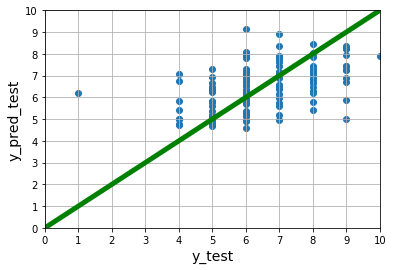

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [53]:
rmse(y_pred_test,y_test)

1.338509667138289

In [54]:
mean_absolute_error(y_pred_test,y_test)

1.0339864685610176